## video2audio

In [1]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import VideoFileClip
import subprocess
import os

file = "main.mp4"
clip = VideoFileClip(file)
print(clip.duration)

p = subprocess.call('ffmpeg -i main.mp4 -acodec pcm_s16le -ac 1 -ar 16000 out1.wav', shell = True)

6625.16


## Spectral analysis

In [2]:
import librosa
audio_data = 'OutputFilename.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(138987520,) 22050


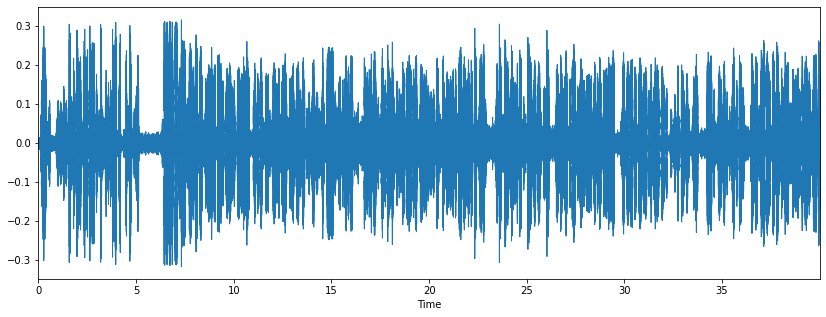

In [3]:
n0 = 220500*4
n1 = 220500*8
xx = x[n0:n1]

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(xx, sr=sr)

## Main run via vosk

In [4]:
from vosk import Model, KaldiRecognizer, SetLogLevel
import sys
import os
import wave
import Word as custom_Word
import json

SetLogLevel(0)

if not os.path.exists("model"):
    print ("Please download the model from https://alphacephei.com/vosk/models and unpack as 'model' in the current folder.")
    exit (1)

wf = wave.open('out1.wav', "rb")
if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
    print ("Audio file must be WAV format mono PCM.")
    exit (1)

model = Model("model")
rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)

results = []
while True:
    data = wf.readframes(120000000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        part_result = json.loads(rec.Result())
        results.append(part_result)
    break
part_result = json.loads(rec.FinalResult())
results.append(part_result)

list_of_Words = []
for sentence in results:
    if len(sentence) == 1:
        continue
    for obj in sentence['result']:
        w = custom_Word.Word(obj)
        list_of_Words.append(w)

wf.close()

answer = []
for word in list_of_Words:
    answer.append(word.to_string())

In [5]:
dictionary = ['goal','penalty','hit','dangerous moment']

In [6]:
for i in answer[:100]:
    print(i)

the                  from 0.09 sec to 14.85 sec, confidence is 100.00%
the                  from 16.17 sec to 56.43 sec, confidence is 100.00%
two                  from 56.43 sec to 56.58 sec, confidence is 100.00%
teams                from 56.58 sec to 56.94 sec, confidence is 100.00%
currently            from 56.94 sec to 57.36 sec, confidence is 100.00%
both                 from 57.36 sec to 57.69 sec, confidence is 100.00%
in                   from 57.69 sec to 57.81 sec, confidence is 100.00%
the                  from 57.81 sec to 57.87 sec, confidence is 100.00%
top                  from 57.87 sec to 58.11 sec, confidence is 100.00%
ten                  from 58.11 sec to 58.41 sec, confidence is 100.00%
in                   from 58.41 sec to 58.53 sec, confidence is 100.00%
the                  from 58.53 sec to 58.62 sec, confidence is 100.00%
fifa                 from 58.65 sec to 58.98 sec, confidence is 100.00%
rankings             from 58.98 sec to 59.64 sec, confidence is 1

In [7]:
import jellyfish
time_start = []
for j in answer:
    for k in dictionary:
        if jellyfish.jaro_distance(j.split(' ')[0],k)> 0.9:
            time_start.append(int(j.split('from ')[1].split(' sec')[0].split('.')[0]))
            print(j)

penalty              from 385.38 sec to 385.80 sec, confidence is 100.00%
penalty              from 392.58 sec to 393.00 sec, confidence is 100.00%
goals                from 436.53 sec to 437.13 sec, confidence is 100.00%
goal                 from 496.53 sec to 496.95 sec, confidence is 100.00%
goals                from 710.04 sec to 710.40 sec, confidence is 100.00%
penalty              from 800.49 sec to 800.88 sec, confidence is 100.00%
goal                 from 820.62 sec to 820.86 sec, confidence is 100.00%
penalty              from 860.16 sec to 860.73 sec, confidence is 100.00%
penalty              from 863.04 sec to 863.46 sec, confidence is 100.00%
goal                 from 870.33 sec to 870.72 sec, confidence is 100.00%
penalty              from 1062.87 sec to 1063.35 sec, confidence is 100.00%
goal                 from 1590.87 sec to 1591.29 sec, confidence is 100.00%
goal                 from 1650.54 sec to 1650.96 sec, confidence is 100.00%
goal                 from 1684.9

In [8]:
time_start

[385,
 392,
 436,
 496,
 710,
 800,
 820,
 860,
 863,
 870,
 1062,
 1590,
 1650,
 1684,
 1795,
 1820,
 1950,
 2326,
 2546,
 2771,
 2883,
 2885,
 2948,
 2954,
 2959,
 3021,
 3023,
 3029,
 3193,
 3208,
 3221,
 3284,
 3686,
 3701,
 3759,
 3805,
 3933,
 4079,
 4694,
 4761,
 5158,
 5268,
 5270,
 5801,
 5864,
 5953,
 6059,
 6068,
 6239,
 6262,
 6307]

In [9]:
del_mass = []
mass_for_double_video = []

for l in range(0,len(time_start)-1):
    if (time_start[l+1]-time_start[l]) <= 20:
        mass_for_double_video.append([time_start[l],time_start[l+1]])
        del_mass.append(l+1)
        del_mass.append(l)       

del_mass1 = list(set(del_mass))
del_mass1.sort()
check_ = 0
for j in del_mass1:
    time_start.pop(j+check_)
    check_-=1
    
delete = []

for k in range(0,len(mass_for_double_video)-1):
    if mass_for_double_video[k][1] == mass_for_double_video[k+1][0]:
        delete.append(k+1)
        mass_for_double_video[k][1] = mass_for_double_video[k+1][1]
        
check_ = 0
for j in delete:
    mass_for_double_video.pop(j+check_)
    check_-=1

In [10]:
print(mass_for_double_video)

[[385, 392], [800, 820], [860, 870], [2883, 2885], [2948, 2959], [3021, 3029], [3193, 3221], [3686, 3701], [5268, 5270], [6059, 6068]]


In [11]:
for i in mass_for_double_video:
    end_time = '00:00:'+str(i[1]-i[0]+20)
    mm = int((i[0]-10)%60)
    hh = int((i[0]-10)/60)

    if hh>=60:
        hh=hh-60
    if len(str(hh)) == 1:
        hh = '0'+str(hh)
    if len(str(mm)) == 1:
        mm = '0'+str(mm)
    start_time = "0"+str(int((i[0]-5)//3600))+":"+str(hh)+":"+str(mm)
    print([start_time,end_time])
    
    if len(str(i[0]))==3:
        st = '0'+str(i[0])
    else:
        st = str(i[0])
    p = subprocess.call('ffmpeg -ss '+str(start_time)+' -t '+str(end_time)+' -i '+str(file)+' -vf fps=30 -c:a copy video_file/'+str(st)+'_o.mp4 -y', shell = True)

['00:06:15', '00:00:27']
['00:13:10', '00:00:40']
['00:14:10', '00:00:30']
['00:47:53', '00:00:22']
['00:48:58', '00:00:31']
['00:50:11', '00:00:28']
['00:53:03', '00:00:48']
['01:01:16', '00:00:35']
['01:27:38', '00:00:22']
['01:40:49', '00:00:29']


In [12]:
for i in range(0,len(time_start)):
    end_time = '00:00:20'
    mm = int((time_start[i]-10)%60)
    hh = int((time_start[i]-10)/60)
    
    if hh>=60:
        hh=hh-60
    if len(str(hh)) == 1:
        hh = '0'+str(hh)
    if len(str(mm)) == 1:
        mm = '0'+str(mm)
    start_time = "0"+str(int((time_start[i]-5)//3600))+":"+str(hh)+":"+str(mm)
    print([start_time,end_time])
    
    if len(str(time_start[i]-5))==3:
        st = '0'+str(time_start[i]-5)
    else:
        st = str(time_start[i]-5)
    p = subprocess.call('ffmpeg -ss '+str(start_time)+' -t '+str(end_time)+' -i '+str(file)+' -vf fps=30 -c:a copy video_file/'+str(st)+'_o.mp4 -y', shell = True)

['00:07:06', '00:00:20']
['00:08:06', '00:00:20']
['00:11:40', '00:00:20']
['00:17:32', '00:00:20']
['00:26:20', '00:00:20']
['00:27:20', '00:00:20']
['00:27:54', '00:00:20']
['00:29:45', '00:00:20']
['00:30:10', '00:00:20']
['00:32:20', '00:00:20']
['00:38:36', '00:00:20']
['00:42:16', '00:00:20']
['00:46:01', '00:00:20']
['00:54:34', '00:00:20']
['01:02:29', '00:00:20']
['01:03:15', '00:00:20']
['01:05:23', '00:00:20']
['01:07:49', '00:00:20']
['01:18:04', '00:00:20']
['01:19:11', '00:00:20']
['01:25:48', '00:00:20']
['01:36:31', '00:00:20']
['01:37:34', '00:00:20']
['01:39:03', '00:00:20']
['01:43:49', '00:00:20']
['01:44:12', '00:00:20']
['01:44:57', '00:00:20']


In [13]:
files = os.listdir('D:/MAYSTRENKO/PROGRAMMING/DATA SCIENCE/hacka-con/video_file/')
needed_files = []
for i in files:
    if '_o' in i:
        needed_files.append(i)
needed_files.sort()

In [14]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
path = 'D:/MAYSTRENKO/PROGRAMMING/DATA SCIENCE/hacka-con/video_file/'
concat_video = [VideoFileClip(path+str(k)) for k in needed_files]

concat_video_fin = []
for i in concat_video:
    concat_video_fin.append(i)
    concat_video_fin.append(VideoFileClip("zas1.mp4"))

final_clip = concatenate_videoclips(concat_video_fin)
final_clip.write_videofile("D:/MAYSTRENKO/PROGRAMMING/DATA SCIENCE/hacka-con/concatenate_answer.mp4")

chunk:   0%|                                                                       | 0/19645 [00:00<?, ?it/s, now=None]

Moviepy - Building video D:/MAYSTRENKO/PROGRAMMING/DATA SCIENCE/hacka-con/concatenate_answer.mp4.
MoviePy - Writing audio in concatenate_answerTEMP_MPY_wvf_snd.mp3


t:   0%|                                                                           | 0/26728 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video D:/MAYSTRENKO/PROGRAMMING/DATA SCIENCE/hacka-con/concatenate_answer.mp4



Moviepy - Done !
Moviepy - video ready D:/MAYSTRENKO/PROGRAMMING/DATA SCIENCE/hacka-con/concatenate_answer.mp4


# heatmap

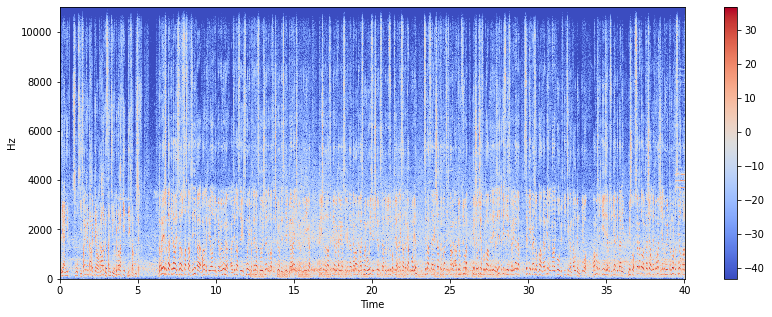

In [15]:
X = librosa.stft(xx)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Спектральный центроид

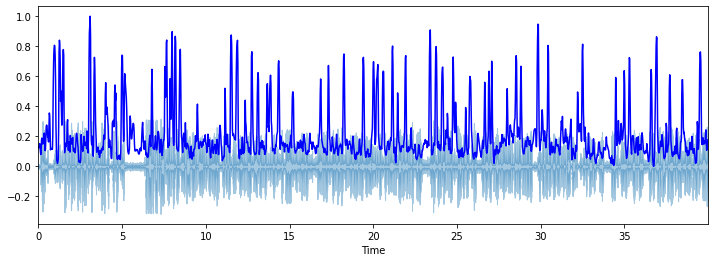

In [16]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(xx, sr=sr)[0]
spectral_centroids.shape
(775,)
# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(xx, axis=0):
    return sklearn.preprocessing.minmax_scale(xx, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(xx, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

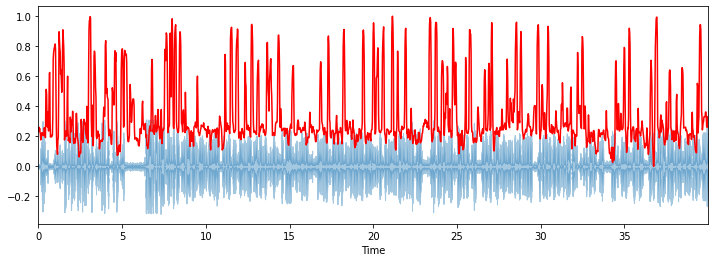

In [17]:
spectral_rolloff = librosa.feature.spectral_rolloff(xx+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(xx, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

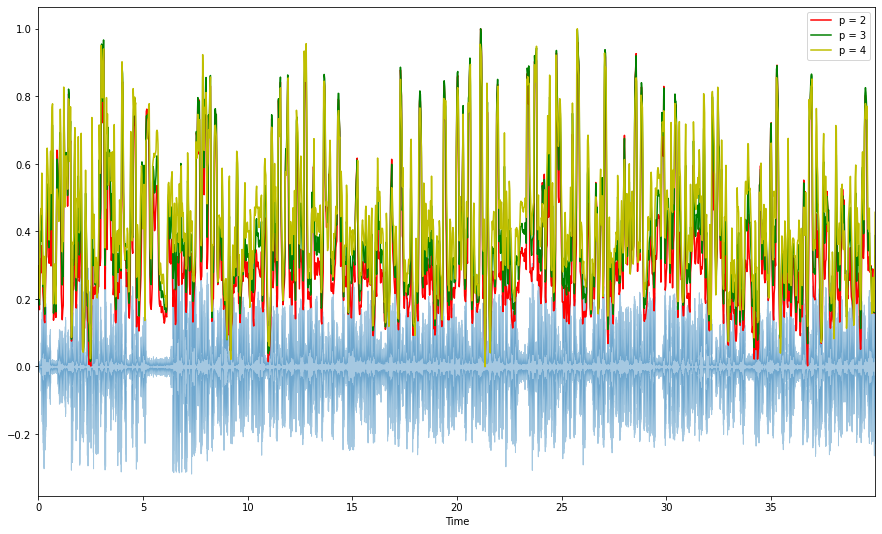

In [18]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(xx+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(xx+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(xx+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(xx, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 1723)


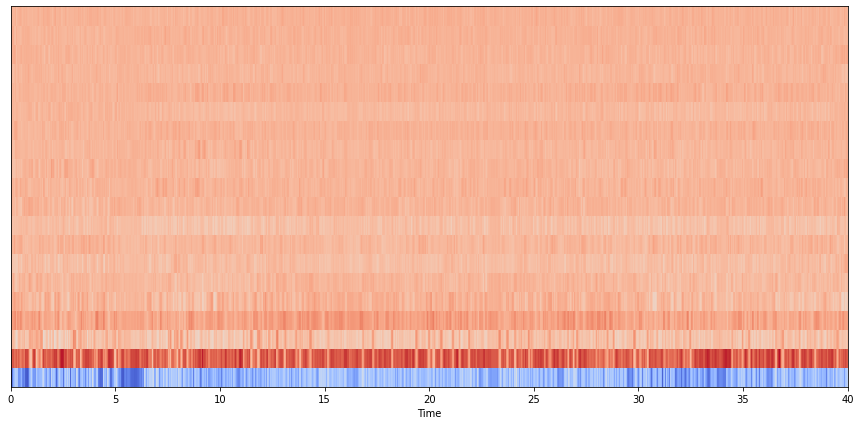

In [19]:
mfccs = librosa.feature.mfcc(xx, sr=sr)
print(mfccs.shape)
(20, 97)
# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

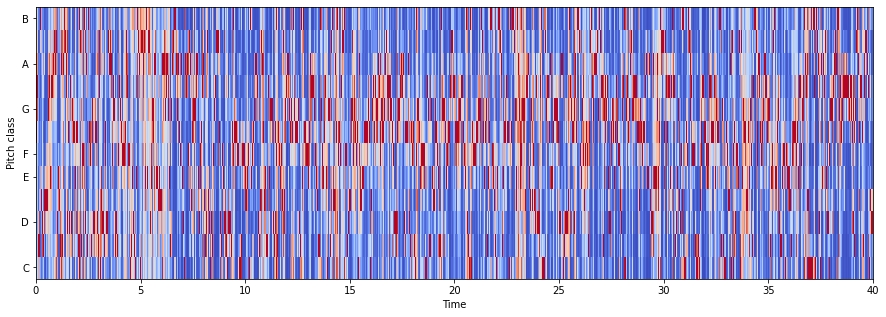

In [20]:
chromagram = librosa.feature.chroma_stft(xx, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [21]:
import numpy as np

def spectral_properties(xx, sr):
    spec = np.abs(np.fft.rfft(xx))
    freq = np.fft.rfftfreq(len(xx), d=1 / sr)
    spec = np.abs(spec)
    amp = spec / spec.sum()
    mean = (freq * amp).sum()
    sd = np.sqrt(np.sum(amp * ((freq - mean) ** 2)))
    amp_cumsum = np.cumsum(amp)
    median = freq[len(amp_cumsum[amp_cumsum <= 0.5]) + 1]
    mode = freq[amp.argmax()]
    Q25 = freq[len(amp_cumsum[amp_cumsum <= 0.25]) + 1]
    Q75 = freq[len(amp_cumsum[amp_cumsum <= 0.75]) + 1]
    IQR = Q75 - Q25
    z = amp - amp.mean()
    w = amp.std()
    skew = ((z ** 3).sum() / (len(spec) - 1)) / w ** 3
    kurt = ((z ** 4).sum() / (len(spec) - 1)) / w ** 4

    result_d = {
        'mean': mean,
        'sd': sd,
        'median': median,
        'mode': mode,
        'Q25': Q25,
        'Q75': Q75,
        'IQR': IQR,
        'skew': skew,
        'kurt': kurt
    }

    return result_d

In [22]:
spectral_properties(xx[3*22050:5*22050], sr)

{'mean': 2613.386143920431,
 'sd': 2632.0952927017,
 'median': 1642.5,
 'mode': 563.5,
 'Q25': 541.5,
 'Q75': 3612.5,
 'IQR': 3071.0,
 'skew': 4.358161444407807,
 'kurt': 28.2172223246691}

In [23]:
spectral_properties(xx[6*22050:10*22050], sr)

{'mean': 2221.163913405437,
 'sd': 2428.012887879369,
 'median': 1150.25,
 'mode': 452.5,
 'Q25': 533.25,
 'Q75': 3114.5,
 'IQR': 2581.25,
 'skew': 5.590491081736402,
 'kurt': 43.80242495635189}

In [24]:
spectral_properties(xx[28*22050:30*22050], sr)

{'mean': 2615.623671143422,
 'sd': 2705.5956613977282,
 'median': 1589.5,
 'mode': 402.5,
 'Q25': 474.0,
 'Q75': 3515.5,
 'IQR': 3041.5,
 'skew': 6.627918252292624,
 'kurt': 63.55032798632282}